In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1, 0.5)
#The first is the number of times we want it to run. 
#The second is the chance we get a zero, which we will use to represent heads here. 

1

What if we run the simulation a thousand times and divided the result by a thousand. Well you see a number pretty close to 0.5 which means half of the time we had a heads and half of the time we had a tails. 

In [3]:
np.random.binomial(1000, 0.5)/1000

0.493

What's the chance of having we're tornado today. It's pretty low even though we do get tornadoes. So maybe there a hundredth of a percentage chance. We can put this into a binomial distribution as a weighting in NumPy. If we run this 100,000 times we see there are pretty minimal tornado events. 

In [4]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

7

Out of 100, 000 days, 7 of them have tornados?

Let's say the chance of a tornado here in Ann Arbor on any given day, is 1% regardless of the time of year. That's higher than realistic but it makes for a quicker demo. And lets say if there's a tornado I'm going to get away from the windows and hide, then come back and do my recording the next day. So what's the chance of this happening two days in a row? 


Well we can use the binomial distribution in NumPy to simulate this. 

Here we create an empty list and we create a number of potential tornado events by asking the NumPy binomial function using our chance of tornado. We'll do this a million times which is just shy of 3,000 (1, 000, 000/265) years worth of events. 

This process is called sampling the distribution. 

Now we can write a little loop to go through the list and look for any two adjacent pairs of ones which means that there were two days that had back to back tornadoes. We see that this ends up being roughly 102 day tornado events over the 3,000 years. Which frankly is still too many for me. My point here though is that modern computational power allows us to very quickly simulate the effects of different parameters in a distribution. Leading to a new way of understanding the problem. You don't have to work out all the math you can quite often simulate the problem instead and observe the results. 

In [7]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

103 tornadoes back to back in 2739.72602739726 years


Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15. Use np.random.binomial(n, p, size) to do 10000 simulations of flipping a fair coin 20 times, then see what proportion of the simulations are 15 or greater.

In [8]:
x = np.random.binomial(20, .5, 10000)
print((x>=15).mean())

0.0215


In [9]:
np.random.uniform(0, 1)

0.5720834086954462

In [10]:
np.random.normal(0.75)

-0.45070568971882663

In [11]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.982773789990725

In [12]:
np.std(distribution)

0.982773789990725

 One of these is the shape of the tailsof the distribution and this is called the kurtosis. We can measure the kurtosis using the statistics functions in the SciPy package. A negative value means the curve is slightly more flat than a normal distribution, and a positive value means the curve is slightly more peaky than a normal distribution. Remember that we aren't measuring the kurtosis of the distribution per se, but of the thousand values which we sampled out of the distribution.

In [13]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.05701628803103409

We could also move out of the normal distributions and push the peak of the curve one way or the other. And this is called the skew. If we test our current sample data, we see that there isn't much of a skew. Let's switch distributions and take a look at a distribution called the Chi Squared distribution, which is also quite commonly used in statistics. The Chi Squared Distribution has only one parameter called the degrees of freedom. The degrees of freedom is closely related to the number of samples that you take from a normal population, and it's important for significance testing. But what I would like you to observe, is that as the degrees of freedom increases, the shape of the Chi Squared distribution changes. In particular, the skew to the left begins to move towards the center. We can observe this through simulation. 

First we'll sample 1,000 values from a Chi Squared distribution with degrees of freedom 2. Now we can see that the skew is quite large. Now if we resample changing degrees of freedom to 5. 

We see that the skew has decreased significantly. 

We can actually plot this right in the Jupyter notebook. I'm not going to talk much about the library we're using here for plotting, because that's the topic of the next course. 

But you can see a histogram with our plot with the two degrees of freedom is skewed much further to the left, while our plot with the five degrees of freedom is not as highly skewed. 

In [14]:
stats.skew(distribution)

-0.010826531618219783

In [15]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9389965833031677

In [16]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2198755588730146

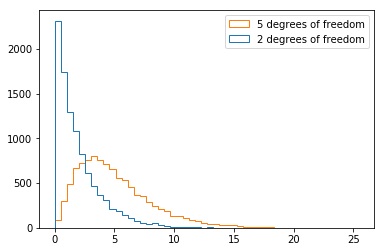

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')

 So far, all of the distributions I've shown have a single high point, a peak. But what if we have multiple peaks? This distribution has two high points, so we call it bimodal. These are really interesting distributions and happen regularly in data mining. A useful insight is that we can actually model these using two normal distributions with different parameters. These are called Gaussian Mixture Models and are particularly useful when clustering data. 